# The Movie Database API Exploration

# Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 500):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,5197.185,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1671
1,2,False,361743,en,1166.594,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,Top Gun: Maverick,8.3,936
2,3,False,778810,en,769.093,/hepwOZWJNUmLzB68gKYEdEJAaD3.jpg,Fireheart,7.5,70
3,4,False,708471,es,701.455,/rSxEMxgLnC1KZAYH6pEksPsLyzR.jpg,El último zombi,2.0,1
4,5,False,756187,en,438.375,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,Sneakerella,6.4,41


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,5197.185,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1671
1,361743,en,1166.594,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,Top Gun: Maverick,8.3,936
2,778810,en,769.093,/hepwOZWJNUmLzB68gKYEdEJAaD3.jpg,Fireheart,7.5,70
3,708471,es,701.455,/rSxEMxgLnC1KZAYH6pEksPsLyzR.jpg,El último zombi,2.0,1
4,756187,en,438.375,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,Sneakerella,6.4,41
...,...,...,...,...,...,...,...
494,37414,en,8.796,/7Uffl7PBz2eDOdAVqrFvdqazx45.jpg,The Killer Inside Me,5.8,462
495,9625,en,9.792,/fMXc2nf3iZFsVbNNmJ5MCtjcwlk.jpg,The Glimmer Man,5.4,301
496,12723,en,7.290,/ysfD96fF56BEzpktyDWChC8Epgs.jpg,Inventing the Abbotts,6.4,172
497,397,en,10.787,/phNRL2E2fa8k0NyP39T4QCIAHgt.jpg,French Kiss,6.4,586


In [8]:
df.shape

(499, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 499 non-null    int64  
 1   original_language  499 non-null    object 
 2   popularity         499 non-null    float64
 3   poster_path        492 non-null    object 
 4   title              499 non-null    object 
 5   vote_average       499 non-null    float64
 6   vote_count         499 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.4+ KB


In [10]:
df['id'] = df['id'].astype('category')                            # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 499 entries, 0 to 498
Series name: id
Non-Null Count  Dtype   
--------------  -----   
499 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,499,499,492,499
unique,499,21,492,497
top,12,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Polaroid
freq,1,383,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,499.000000,499.000000,499.000000
mean,47.129725,6.218236,1506.174349
std,244.597838,1.641825,2775.806754
min,7.080000,0.000000,0.000000
25%,12.282000,5.800000,116.500000
50%,17.599000,6.500000,523.000000
75%,31.429000,7.100000,1545.500000
max,5197.185000,9.000000,23258.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

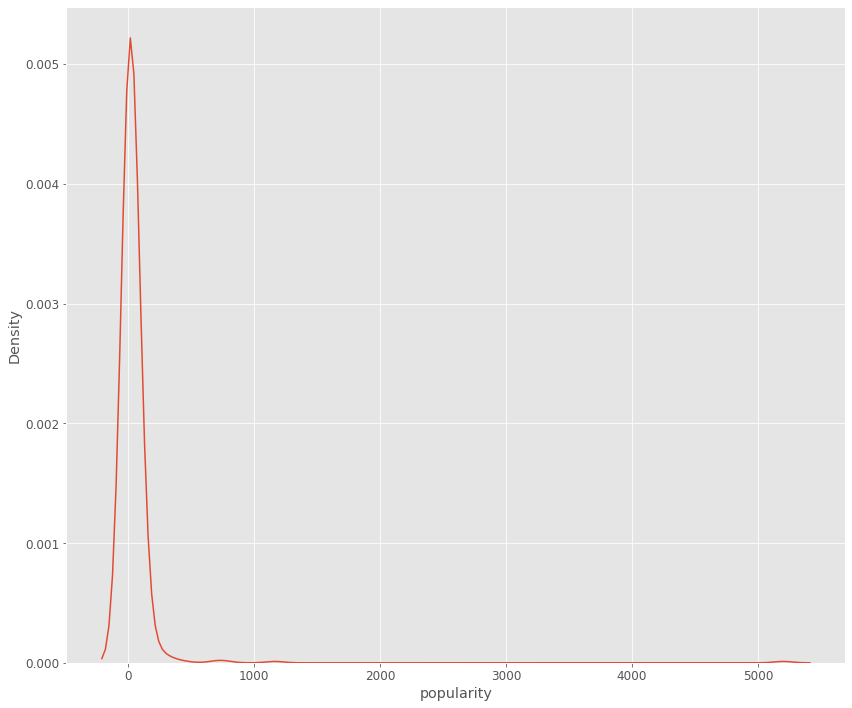

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

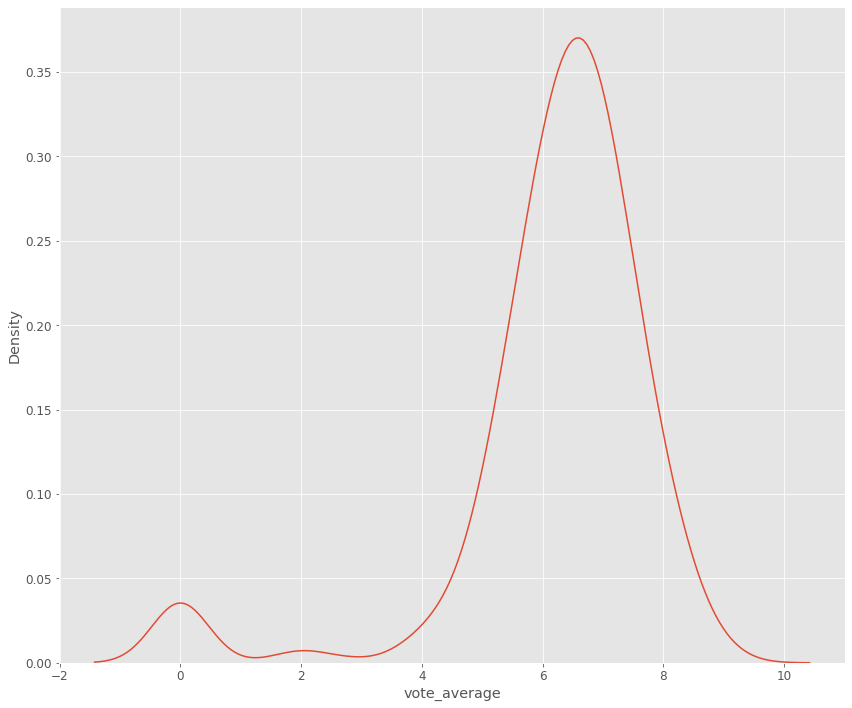

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

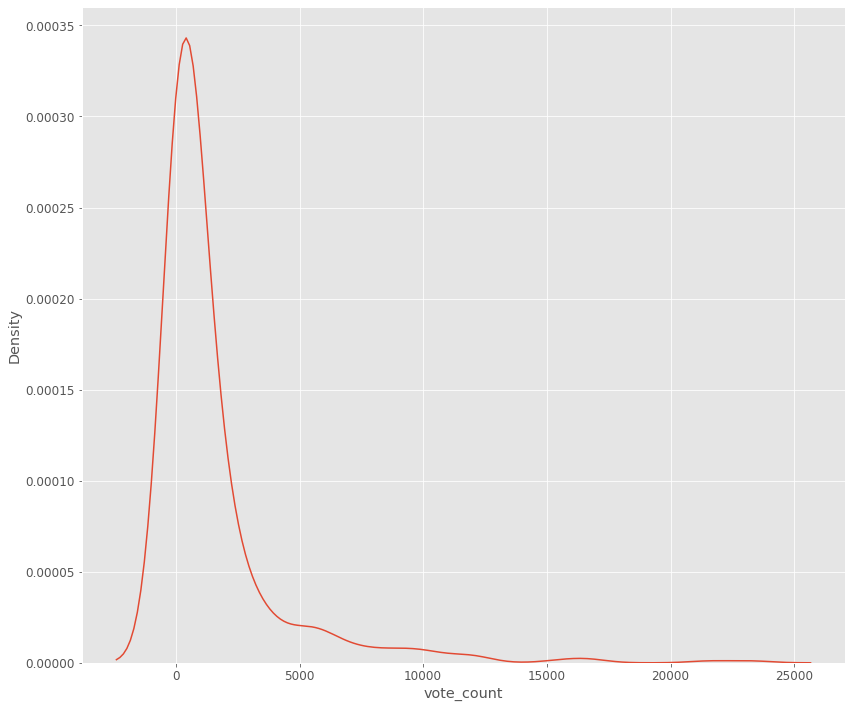

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          7
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

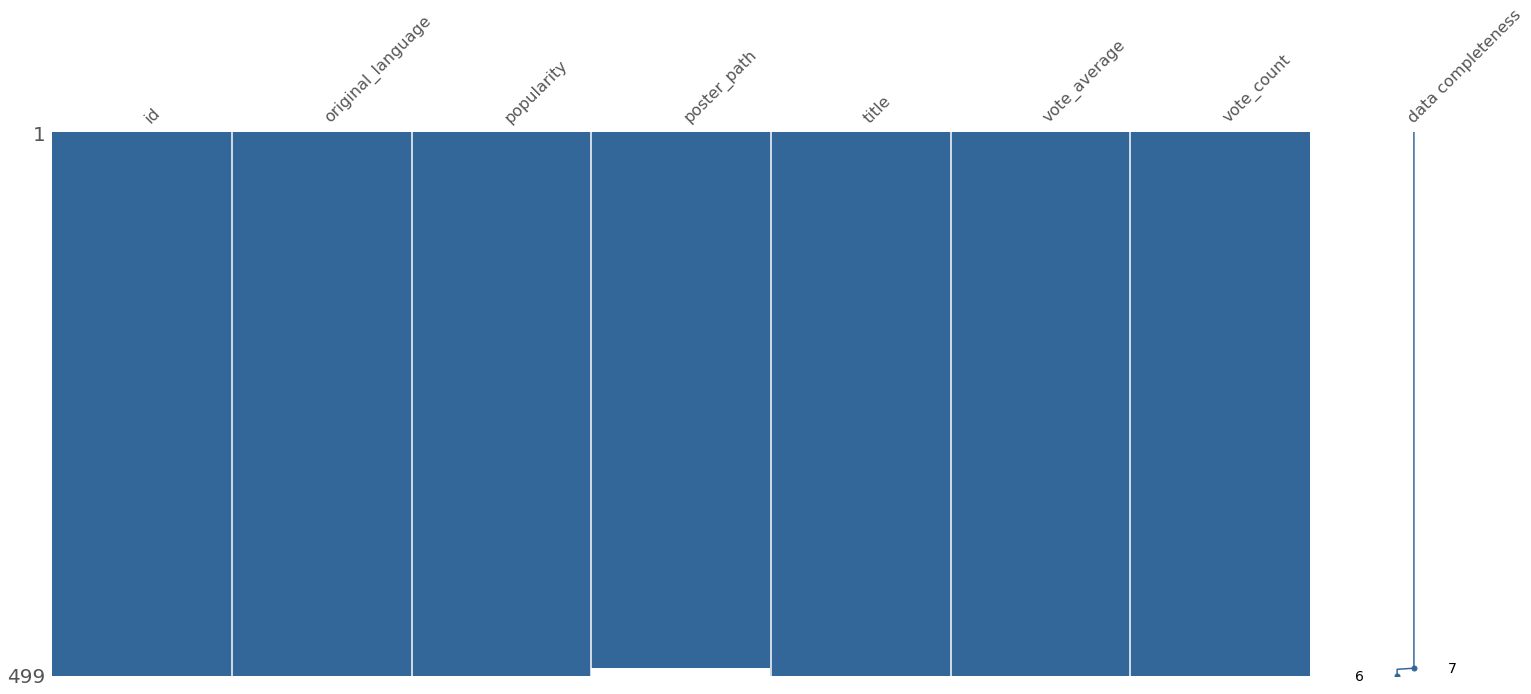

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

# Movies With Release Date

In [20]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:52]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [21]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,5197.185,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1671
1,2,False,361743,en,1166.594,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,2022-05-24,Top Gun: Maverick,8.3,936
2,3,False,778810,en,769.093,/hepwOZWJNUmLzB68gKYEdEJAaD3.jpg,2022-01-16,Fireheart,7.5,70
3,4,False,708471,es,701.455,/rSxEMxgLnC1KZAYH6pEksPsLyzR.jpg,2021-12-02,El último zombi,2.0,1
4,5,False,756187,en,438.375,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,2022-05-11,Sneakerella,6.4,41


In [22]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,5197.185,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1671
1,361743,en,1166.594,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,2022-05-24,Top Gun: Maverick,8.3,936
2,778810,en,769.093,/hepwOZWJNUmLzB68gKYEdEJAaD3.jpg,2022-01-16,Fireheart,7.5,70
3,708471,es,701.455,/rSxEMxgLnC1KZAYH6pEksPsLyzR.jpg,2021-12-02,El último zombi,2.0,1
4,756187,en,438.375,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,2022-05-11,Sneakerella,6.4,41


In [23]:
df1.shape

(52, 8)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52 non-null     int64  
 1   original_language  52 non-null     object 
 2   popularity         52 non-null     float64
 3   poster_path        52 non-null     object 
 4   release_date       52 non-null     object 
 5   title              52 non-null     object 
 6   vote_average       52 non-null     float64
 7   vote_count         52 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [25]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [26]:
df1['id'] = df1['id'].astype('category')                            # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: id
Non-Null Count  Dtype   
--------------  -----   
52 non-null     category
dtypes: category(1)
memory usage: 2.6 KB


In [27]:
df1['release_date'] = pd.to_datetime(df1['release_date'])                             # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [28]:
df1['year'] = df1['release_date'].dt.year                         # extract year
df1['month'] = df1['release_date'].dt.month                       # extract month
df1['day'] = df1['release_date'].dt.day                           # extract day
df1['day_name'] = df1['release_date'].dt.day_name()               # extract day name
df1['week'] = df1['release_date'].dt.week                         # extract week
df1['quarter']= df1['release_date'].dt.quarter                    # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,5197.185,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1671,2022,4,6,Wednesday,14,2
1,361743,en,1166.594,/62HCnUTziyWcpDaBO2i1DX17ljH.jpg,2022-05-24,Top Gun: Maverick,8.3,936,2022,5,24,Tuesday,21,2
2,778810,en,769.093,/hepwOZWJNUmLzB68gKYEdEJAaD3.jpg,2022-01-16,Fireheart,7.5,70,2022,1,16,Sunday,2,1
3,708471,es,701.455,/rSxEMxgLnC1KZAYH6pEksPsLyzR.jpg,2021-12-02,El último zombi,2.0,1,2021,12,2,Thursday,48,4
4,756187,en,438.375,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,2022-05-11,Sneakerella,6.4,41,2022,5,11,Wednesday,19,2


In [29]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,52.0,52,52,52,52,52
unique,52.0,6,52,52,52,7
top,12.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,41,1,1,1,16
first,NaN,NaN,NaN,1990-06-07 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-05-24 00:00:00,NaN,NaN


In [30]:
df1.drop(columns=['year',	'month', 'day',	'week',	'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,52.000000,52.000000,52.000000
mean,275.507135,6.682692,3496.961538
std,723.471079,1.251935,5325.220665
min,58.860000,2.000000,1.000000
25%,87.508250,6.275000,121.750000
50%,115.165500,6.900000,846.000000
75%,176.758500,7.400000,4196.500000
max,5197.185000,8.700000,21571.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

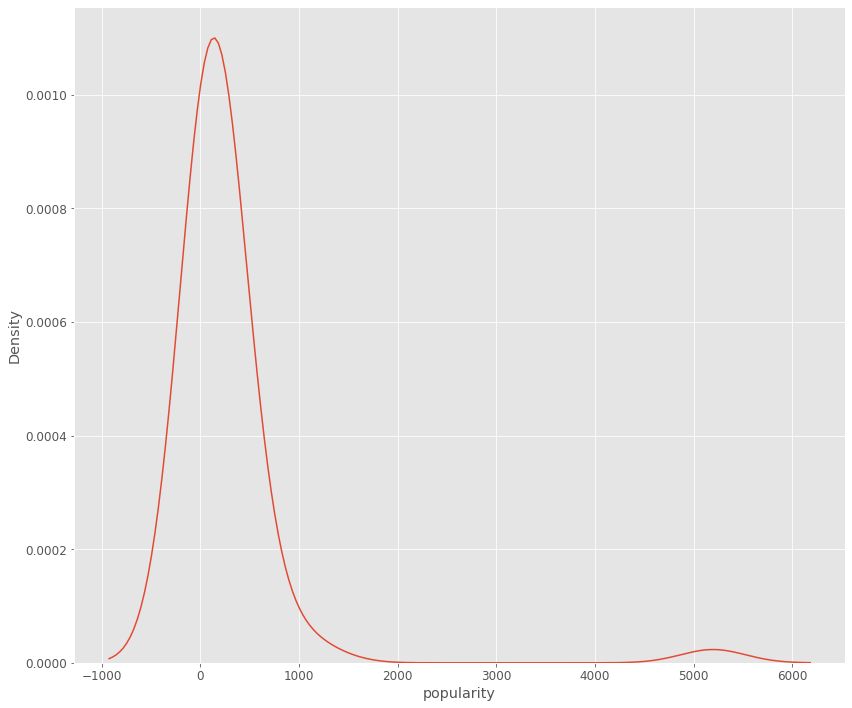

In [31]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

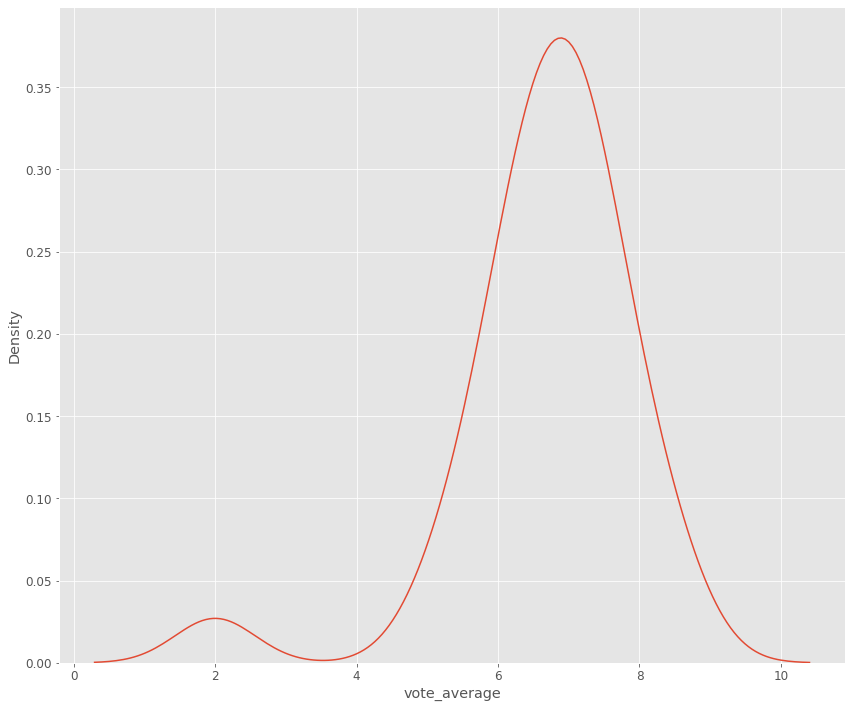

In [32]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

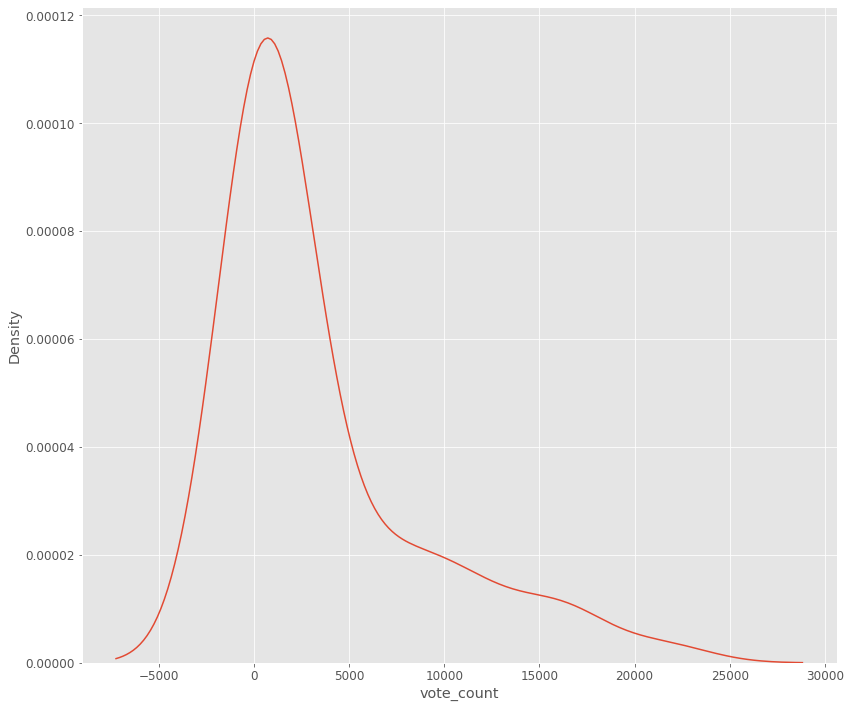

In [33]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [34]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

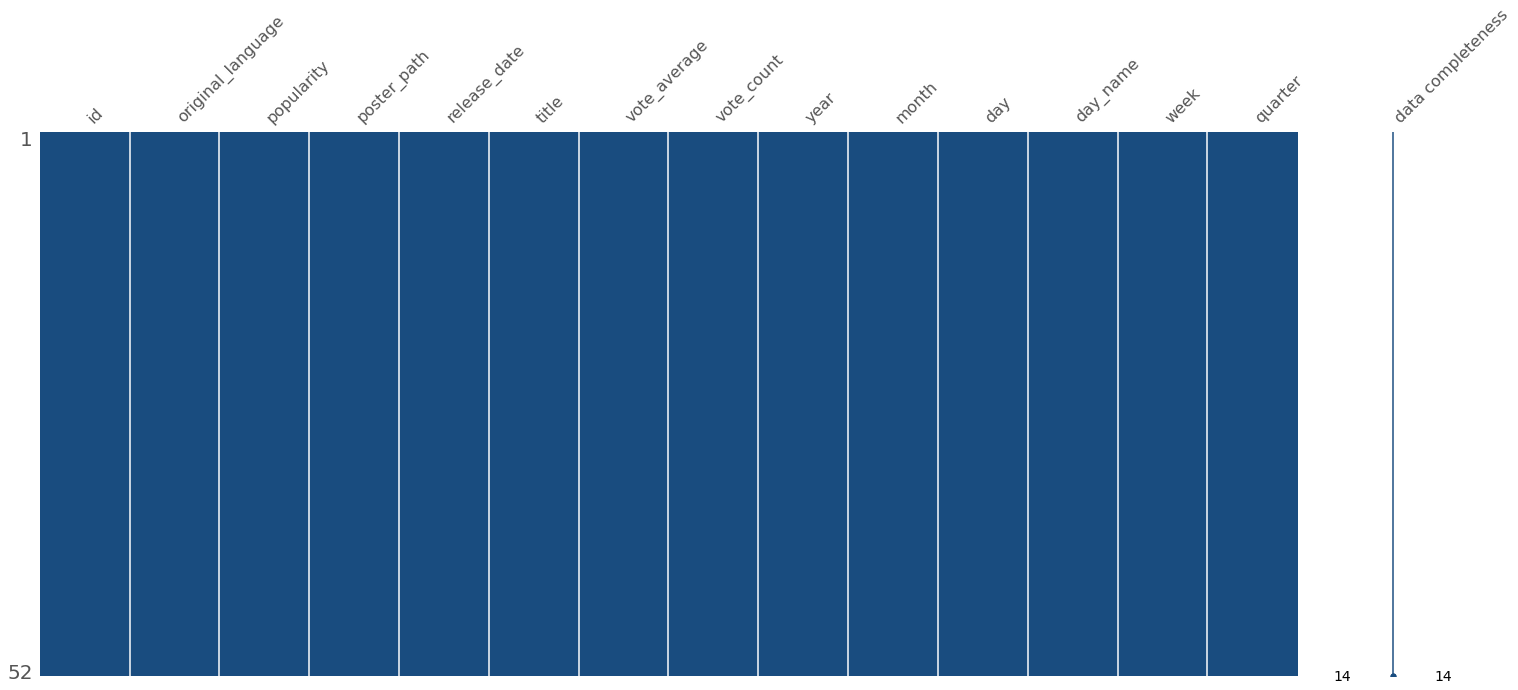

In [35]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))